Part 1
Question 2:

Question 1:
1. The analysis is quite sensitive to outlier and the size of the smallest group must be larger than the number of predictor variables.

Multivariate normality: Independant normal variables.

Inpependence: Participants are assumed to be randomly sampled.

2. Observation of each class is drawn from a normal distribution.

Assumes each class has it's own covariance matrix.

3. Assumes a certain distance evaluation has been chosen (euclidian, manhattan, etc.) That the k chosen is smaller than the smallest class. (This I wrote on my own, not sure if there is more to this).

4. CART does not seem to have any initial assumptions.

Question 2:

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from copy import deepcopy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

C:\Users\anton\AppData\Local\Temp/ipykernel_24756/2450044795.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[4, 4], cov=covariance_1, size=(400))


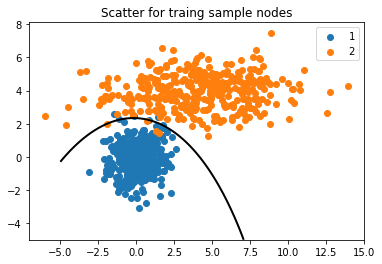

In [3]:
X1 = np.random.standard_normal((2, 400))
covariance_1 = [[10, 1],[-2, 1]]
X2 = np.random.multivariate_normal(mean=[4, 4], cov=covariance_1, size=(400))
X2 = np.transpose(X2)

train_X1 = X1[:, :360]
test_X1 = X1[:, 360:]
train_X2 = X2[:, :360]
test_X2 = X2[:, 360:]

X_0_train = np.vstack((train_X1[0,:], train_X2[0,:])).flatten()
X_1_train = np.vstack((train_X1[1,:], train_X2[1,:])).flatten()
X_train = np.zeros((720, 3))
X_train[:, 0] = X_0_train
X_train[:, 1] = X_1_train
X_train[:360, 2] = 1
X_train[360:, 2] = 2 
X_0_train = np.vstack((test_X1[0,:], test_X2[0,:])).flatten()
X_1_train = np.vstack((test_X1[1,:], test_X2[1,:])).flatten()
X_test = np.zeros((80, 3))
X_test[:, 0] = X_0_train
X_test[:, 1] = X_1_train
X_test[:40, 2] = 1
X_test[40:, 2] = 2 
np.random.shuffle(X_test)
np.random.shuffle(X_train)

model = QuadraticDiscriminantAnalysis(store_covariance=True)
model.fit(X_train[:, :2], X_train[:, 2:].ravel())

# Create the line
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')

plt.scatter(train_X1[0], train_X1[1], label="1")
plt.scatter(train_X2[0], train_X2[1], label="2")
plt.legend()
plt.title('Scatter for traing sample nodes')
plt.show()


The prediction correctness for test_values: 98.75%


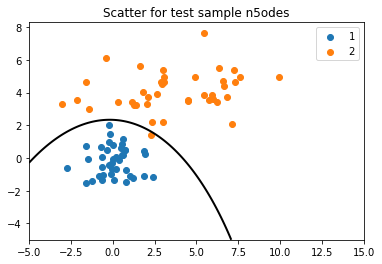

In [4]:

# Small prediction algo
checks = 0
for i in range(80):
    prediction = model.predict([X_test[i, :2]])
    if prediction == X_test[i, 2:]:
        checks += 1
print(f'The prediction correctness for test_values: {checks/80*100}%')

plt.scatter(test_X1[0], test_X1[1], label="1")
plt.scatter(test_X2[0], test_X2[1], label="2")
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.legend()
plt.title('Scatter for test sample n5odes')
plt.show()

Part 2 - CART

In [5]:
X_train = np.zeros((160, 3))
X_test = np.zeros((40, 3))


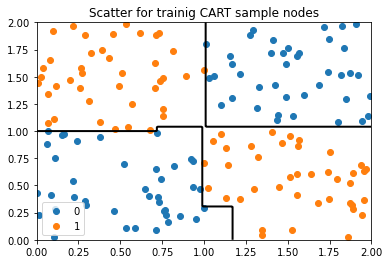

In [6]:
# Insert the different ranges

X_train[0:40, 0] = np.random.uniform(0, 1, size=40)
X_train[0:40, 1] = np.random.uniform(0, 1, size=40)
X_train[0:40, 2] = 0
X_test[0:10, 0] =    np.random.uniform(0, 1, size=10)
X_test[0:10, 1] =    np.random.uniform(0, 1, size=10)
X_test[0:10, 2] = 0
X_train[40:80, 0] = np.random.uniform(0, 1, size=40)
X_train[40:80, 1] = np.random.uniform(1, 2, size=40)
X_train[40:80, 2] = 1
X_test[10:20, 0] =    np.random.uniform(0, 1, size=10)
X_test[10:20, 1] =    np.random.uniform(1, 2, size=10)
X_test[10:20, 2] = 0
X_train[80:120, 0] = np.random.uniform(1, 2, size=40)
X_train[80:120, 1] = np.random.uniform(0, 1, size=40)
X_train[80:120, 2] = 1
X_test[20:30, 0] =    np.random.uniform(1, 2, size=10)
X_test[20:30, 1] =    np.random.uniform(0, 1, size=10)
X_test[20:30, 2] = 1
X_train[120:160, 0] = np.random.uniform(1, 2, size=40)
X_train[120:160, 1] = np.random.uniform(1, 2, size=40)
X_train[120:160, 2] = 0
X_test[30:40, 0] =    np.random.uniform(1, 2, size=10)
X_test[30:40, 1] =    np.random.uniform(1, 2, size=10)
X_test[30:40, 2] = 0
np.random.shuffle(X_train)
np.random.shuffle(X_test)

model = DecisionTreeClassifier()
model = model.fit(X_train[:, :2], X_train[:, 2:])

X_train_0 = np.array([row[:2] for row in X_train if row[2] == 0])
X_train_1 = np.array([row[:2] for row in X_train if row[2] == 1])
X_test_0 = np.array([row[:2] for row in X_train if row[2] == 0])
X_test_1 = np.array([row[:2] for row in X_train if row[2] == 1])

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label="0")
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for trainig CART sample nodes')
plt.show()





The prediction correctness for test_values: 72.5%


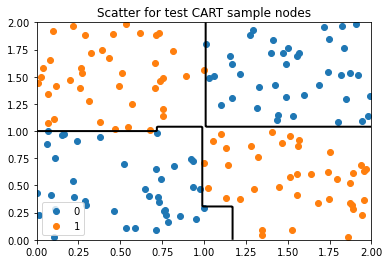

In [7]:
checks = 0
for i in range(40):
    prediction = model.predict([X_test[i, :2]])
    if prediction == X_test[i, 2:]:
        checks += 1

print(f'The prediction correctness for test_values: {checks/40*100}%')

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], label="0")
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for test CART sample nodes')
plt.show()


In [30]:
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

uci_bc_data = uci_bc_data.sample(frac=1).reset_index(drop=True)
y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()

In [9]:
print(f'number of Bs:{len(y[y==0])=}, number of Ms:{len(y[y==1])=}')
print(uci_bc_data)
print(f'The features seem to be numerical')
print(f'Some of them have the same scale, but some probably need to be scaled')

number of Bs:len(y[y==0])=357, number of Ms:len(y[y==1])=212
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           B        12.76         13.37           82.29      504.1   
1           M        20.26         23.03          132.40     1264.0   
2           B        15.04         16.74           98.73      689.4   
3           B        14.03         21.25           89.79      603.4   
4           B        14.26         18.17           91.22      633.1   
..        ...          ...           ...             ...        ...   
564         B        12.47         17.31           80.45      480.1   
565         B        15.00         15.51           97.45      684.5   
566         M        18.31         18.58          118.60     1041.0   
567         B        12.06         18.90           76.66      445.3   
568         M        20.64         17.35          134.80     1335.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0      

In [31]:
# Closer look at means and variance
for i in uci_bc_data:
    if i == 'diagnosis':
        continue
    mean_i = np.mean(uci_bc_data[i])
    var_i = np.var(uci_bc_data[i])
    print(f'{i}: mean={mean_i:.4f}, var={var_i:.4f}')

radius_mean: mean=14.1273, var=12.3971
texture_mean: mean=19.2896, var=18.4664
perimeter_mean: mean=91.9690, var=589.4028
area_mean: mean=654.8891, var=123625.9031
smoothness_mean: mean=0.0964, var=0.0002
compactness_mean: mean=0.1043, var=0.0028
concavity_mean: mean=0.0888, var=0.0063
concave_points_mean: mean=0.0489, var=0.0015
symmetry_mean: mean=0.1812, var=0.0008
fractal_dimension_mean: mean=0.0628, var=0.0000
radius_se: mean=0.4052, var=0.0768
texture_se: mean=1.2169, var=0.3038
perimeter_se: mean=2.8661, var=4.0807
area_se: mean=40.3371, var=2065.7946
smoothness_se: mean=0.0070, var=0.0000
compactness_se: mean=0.0255, var=0.0003
concavity_se: mean=0.0319, var=0.0009
concave_points_se: mean=0.0118, var=0.0000
symmetry_se: mean=0.0205, var=0.0001
fractal_dimension_se: mean=0.0038, var=0.0000
radius_worst: mean=16.2692, var=23.3192
texture_worst: mean=25.6772, var=37.7101
perimeter_worst: mean=107.2612, var=1127.1464
area_worst: mean=880.5831, var=323597.6709
smoothness_worst: mean

In [32]:
def accuracy(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return (tp+tn)/sum(cm.ravel())

def sensitivity(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return tp/(tp+tn)

def specificity(cm: np.array) -> float:
    tn, fp, _, _ = cm.ravel()
    return tn/(tn+fp)

def precision(cm: np.array) -> float:
    _, fp, _, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm: np.array) -> float:
    _, _, fn, tp = cm.ravel()
    return tp/(tp+fn)

def F_1_score(prec, rec) -> float:
    return 2*prec*rec/(prec+rec)

def MCC(cm) -> float:
    tn, fp, fn, tp = cm.ravel()
    return (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

In [33]:
folds = 10
test_indexs = np.random.choice(range(folds), folds, replace=False)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
# models = ['lda', 'qda', 'cart', 'log_reg']
models = ['lda', 'qda', 'cart']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    for i in range(folds):
        train_X = deepcopy(X)
        train_y = deepcopy(y)
        index = test_indexs[i]
        test_range = range((index*fold_size),((index+1)*fold_size))
        test_X = X[test_range, :]
        test_y = y[test_range]
        train_X = np.delete(train_X, test_range, axis=0)
        train_y = np.delete(train_y, test_range)
        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    # disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
    #                             display_labels=model.classes_)
    # disp.plot()
    # plt.title(f'CM for: {x}')
    # plt.show()

print(sum(train_y)/len(train_y))
    



fold_size=56, sum(sum(model_cms[x]))=56.0
for x='lda', acc=0.9536, sens=0.3483, spec=0.9943, prec=0.9894, rec=0.8857, f1_score=0.9347, mcc=0.9021
fold_size=56, sum(sum(model_cms[x]))=56.0
for x='qda', acc=0.9571, sens=0.3694, spec=0.9657, prec=0.9429, rec=0.9429, f1_score=0.9429, mcc=0.9086
fold_size=56, sum(sum(model_cms[x]))=56.0
for x='cart', acc=0.9268, sens=0.3661, spec=0.9400, prec=0.9005, rec=0.9048, f1_score=0.9026, mcc=0.8440
0.3684210526315789


In [34]:
# stratified cv
folds = 10
skf = StratifiedKFold(n_splits=10, shuffle=True)
# print(skf.split(X, y))
# test_indexs = np.random.choice(range(folds), folds, replace=False)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
# models = ['lda', 'qda', 'cart', 'log_reg']
models = ['lda', 'qda', 'cart']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    # for i in range(folds):
    for train_index, test_index in skf.split(X, y):
        train_X, test_X = X[train_index], X[test_index]
        train_y, test_y = y[train_index], y[test_index]
        # print(np.shape(train_X))
        # train_X = deepcopy(X)
        # train_y = deepcopy(y)
        # index = test_indexs[i]
        # test_range = range((index*fold_size),((index+1)*fold_size))
        # test_X = X[test_range, :]
        # test_y = y[test_range]
        # train_X = np.delete(train_X, test_range, axis=0)
        # train_y = np.delete(train_y, test_range)
        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    # disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
    #                            display_labels=model.classes_)
    # disp.plot()
    # plt.title(f'CM for: {x}')
    # plt.show()

    
print(sum(train_y)/len(train_y))



fold_size=56, sum(sum(model_cms[x]))=56.900000000000006
for x='lda', acc=0.9596, sens=0.3498, spec=0.9944, prec=0.9896, rec=0.9009, f1_score=0.9432, mcc=0.9144
fold_size=56, sum(sum(model_cms[x]))=56.900000000000006
for x='qda', acc=0.9578, sens=0.3670, spec=0.9664, prec=0.9434, rec=0.9434, f1_score=0.9434, mcc=0.9098
fold_size=56, sum(sum(model_cms[x]))=56.9
for x='cart', acc=0.9350, sens=0.3609, spec=0.9524, prec=0.9187, rec=0.9057, f1_score=0.9121, mcc=0.8606
0.3723196881091618


THEME: Detecting mislabeled observations

In [14]:
ps = np.round(np.linspace(0,25,5))/100
for p in ps:
    global_test_X = X[0:int(np.floor(0.25*len(X)))]
    global_test_y = y[0:int(np.floor(0.25*len(X)))]
    global_train_X = X[int(np.floor(0.25*len(X))):]
    global_train_y = y[int(np.floor(0.25*len(X))):]
    miss_label_indices = random.sample(range(0,len(y)), round(0.25*len(y)))
    for i in miss_label_indices:
        if y[i] == 0:
            y[i] = 1
        else:
            y[i] = 0

    folds = 10
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    test_indexs = np.random.choice(range(folds), folds, replace=False)
    fold_size = int(global_train_X.shape[0]/folds)
    model_cms = dict()
    # models = ['lda', 'qda', 'cart', 'log_reg']
    # models = ['lda', 'qda', 'cart']
    models = ['cart']
    for model in models:
        model_cms[model] = np.zeros((2, 2))

    for x in models:
        if x == 'lda':
            model = LinearDiscriminantAnalysis()
        elif x == 'qda':
            model = QuadraticDiscriminantAnalysis()
        elif x == 'cart':
            model = DecisionTreeClassifier()
        elif x == 'log_reg':
            model = LogisticRegression()

        # for i in range(folds):
        for train_index, test_index in skf.split(global_train_X, global_train_y):
            train_X, test_X = global_train_X[train_index], global_train_X[test_index]
            train_y, test_y = global_train_y[train_index], global_train_y[test_index]
            
            model = model.fit(train_X, train_y)
            prediction = model.predict(test_X)
            model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


        model_cms[x] /= 10
        acc = accuracy(model_cms[x])
        sens = sensitivity(model_cms[x])
        spec = specificity(model_cms[x])
        prec = precision(model_cms[x])
        rec = recall(model_cms[x])
        f1_score = F_1_score(prec, rec)
        mcc = MCC(model_cms[x])
        print(p)
        print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
        print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')




0.0
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='cart', acc=0.5948, sens=0.3504, spec=0.6627, prec=0.5145, rec=0.5000, f1_score=0.5071, mcc=0.1634
0.06
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='cart', acc=0.5152, sens=0.4318, spec=0.5435, prec=0.4750, rec=0.4822, f1_score=0.4786, mcc=0.0257
0.12
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='cart', acc=0.4871, sens=0.4615, spec=0.5161, prec=0.4776, rec=0.4571, f1_score=0.4672, mcc=-0.0268
0.19
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='cart', acc=0.5199, sens=0.4459, spec=0.5541, prec=0.5000, rec=0.4829, f1_score=0.4913, mcc=0.0370
0.25
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='cart', acc=0.4848, sens=0.4251, spec=0.5219, prec=0.4467, rec=0.4422, f1_score=0.4444, mcc=-0.0359


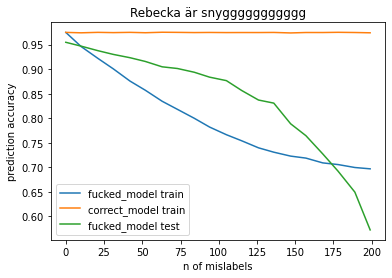

In [96]:
# Antons lösning
model2_scores = []
model1_scores = []
model3_scores = []
ps = np.round(np.linspace(0, int(35*5.69), 20))
n_of_tries = 100
for p in ps:
    model1_score = 0
    model2_score = 0
    model3_score = 0
    model2 = QuadraticDiscriminantAnalysis()
    model1 = QuadraticDiscriminantAnalysis()
    for _ in range(n_of_tries):
        cutoff = int(len(y)*0.75)
        X_train, X_test, y_train, y_test = train_test_split(
                X, y,stratify=y, test_size=0.25)

        change_indexes = np.random.choice(cutoff, int(p), replace=False)
        y_train_change = deepcopy(y_train)
        for i in change_indexes:
            y_train_change[i] = (y_train_change[i]+1) % 2
        
        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train_change)
        prediction1 = model1.predict(X_train)
        prediction2 = model2.predict(X_train)
        prediction3 = model2.predict(X_test)

        model1_score += 1-zero_one_loss(prediction1, y_train)
        model2_score += 1-zero_one_loss(prediction2, y_train_change)
        model3_score += 1-zero_one_loss(prediction3, y_test)

        
    model2_score /= n_of_tries
    model1_score /= n_of_tries
    model3_score /= n_of_tries
    model2_scores.append(model2_score)
    model1_scores.append(model1_score)
    model3_scores.append(model3_score)

plt.plot(ps, model2_scores, label='fucked_model train')
plt.plot(ps, model1_scores, label='correct_model train')
plt.plot(ps, model3_scores, label='fucked_model test')
plt.xlabel('n of mislabels')
plt.ylabel('prediction accuracy')
plt.legend()
plt.title('Rebecka är snyggggggggggg')
plt.show()

In [ ]:
model2_scores = []
model1_scores = []
ps = np.round(np.linspace(0, int(25*5.69), 20))
n_of_tries = 1
for p in ps:
    model1_score = 0
    model2_score = 0
    model2 = QuadraticDiscriminantAnalysis()
    model1 = QuadraticDiscriminantAnalysis()
    for _ in range(n_of_tries):
        cutoff = int(len(y)*0.75)
        X_train, X_test, y_train, y_test = train_test_split(
                X, y,stratify=y, test_size=0.25)

        change_indexes = np.random.choice(cutoff, int(p), replace=False)
        y_train_change = deepcopy(y_train)
        for i in change_indexes:
            y_train_change[i] = (y_train_change[i]+1) % 2
        
        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train_change)
        prediction1 = model1.predict(X_test)
        prediction2 = model2.predict(X_test)
        prediction3 = model2.predict()

        model1_score += 1-zero_one_loss(prediction1, y_test)
        model2_score += 1-zero_one_loss(prediction2, y_test_change)
    
    model2_score /= n_of_tries
    model1_score /= n_of_tries
    model2_scores.append(model2_score)
    model1_scores.append(model1_score)

plt.plot(ps, model2_scores, label='fucked_data')
plt.plot(ps, model1_scores, label='correct_data')
plt.xlabel('n of mislabels')
plt.ylabel('prediction accuracy')
plt.legend()
plt.show()